In [2]:
# scratch code to get ocn forcing .nc files

#from datetime import datetime

import sys
import pickle
import matplotlib.pyplot as plt
import numpy as np
#import cartopy.crs as ccrs
#import cartopy.feature as cfeature
#import matplotlib.pyplot as plt
#import numpy as np
#import scipy.ndimage as ndimage
#import xarray as xr
#import netCDF4 as nc
#from scipy.interpolate import RegularGridInterpolator


In [3]:


#sys.path.append('/Users/mspydell/research/FF2024/models/SDPM_mss/PFM/sdpm_py_util')
sys.path.append('/home/mspydell/models/PFM_root/PFM/sdpm_py_util')

import atm_functions as atmfuns
import ocn_functions as ocnfuns
import grid_functions as grdfuns
import plotting_functions as plotfuns

# row after setting suitable values for theta_b, theta_s, Tcline, Nz, hraw, eta, we could probably run the line:



/home/mspydell/models/PFM_root/PFM/sdpm_py_util/ocn_functions.py:15: UserWarning: The seawater library is deprecated! Please use gsw instead.
  import seawater


In [4]:
run_type = 'forecast'
# the year, month, day of the 
yyyymmdd='20240716'
# the hour in Z of the forecast, hycom has forecasts once per day starting at 1200Z
hhmm='1200'
# we will use hycom for IC and BC
ocn_mod = 'hycom'
# we will use nam_nest for the atm forcing
atm_mod = 'nam_nest'
# we will use opendap, and netcdf to grab ocn, and atm data
get_method = 'open_dap_nc'

# get the ROMS grid as a dict
#fngr = '/Users/mspydell/research/FF2024/models/SDPM_mss/PFM_user/grids/GRID_SDTJRE_LV1.nc'
fngr = '/home/mspydell/models/PFM_root/PFM_user/grids/GRID_SDTJRE_LV1.nc'
RMG = grdfuns.roms_grid_to_dict(fngr)



In [4]:
# make the atm .nc file here.
# fn_out is the name of the atm.nc file used by roms
#fn_out = '/Users/mspydell/research/FF2024/models/SDPM_mss/atm_stuff/atm_test_file_v2.nc'
fn_out = '/home/mspydell/models/PFM_root/example_dotnc_files/atm_forcing.nc'
# make a switch to see if this file exists. If it exists, we don't need to run the code in this block

# get the atm data as a dict
# need to specify hhmm because nam forecast are produced at 6 hr increments
# and hycom forecasts start at 1200Z
ATM = atmfuns.get_atm_data_as_dict(yyyymmdd,hhmm,run_type,atm_mod,get_method)
# plot ATM data
#plotfuns.plot_atm_fields(ATM, RMG, atm_mod, fields_to_plot='temperature')


getting atm forecast for:
[datetime.datetime(2024, 7, 16, 12, 0)
 datetime.datetime(2024, 7, 16, 15, 0)
 datetime.datetime(2024, 7, 16, 18, 0)
 datetime.datetime(2024, 7, 16, 21, 0)
 datetime.datetime(2024, 7, 17, 0, 0) datetime.datetime(2024, 7, 17, 3, 0)
 datetime.datetime(2024, 7, 17, 6, 0) datetime.datetime(2024, 7, 17, 9, 0)
 datetime.datetime(2024, 7, 17, 12, 0)
 datetime.datetime(2024, 7, 17, 15, 0)
 datetime.datetime(2024, 7, 17, 18, 0)
 datetime.datetime(2024, 7, 17, 21, 0)
 datetime.datetime(2024, 7, 18, 0, 0) datetime.datetime(2024, 7, 18, 3, 0)
 datetime.datetime(2024, 7, 18, 6, 0) datetime.datetime(2024, 7, 18, 9, 0)
 datetime.datetime(2024, 7, 18, 12, 0)
 datetime.datetime(2024, 7, 18, 15, 0)
 datetime.datetime(2024, 7, 18, 18, 0)
 datetime.datetime(2024, 7, 18, 21, 0)
 datetime.datetime(2024, 7, 19, 0, 0)]


In [6]:

# put the atm data on the roms grid, and rotate the velocities
# everything in this dict turn into the atm.nc file
ATM_R  = atmfuns.get_atm_data_on_roms_grid(ATM,RMG)
#plotfuns.plot_all_fields_in_one(ATM, ATM_R, RMG, atm_mod, fields_to_plot='temperature')

# output a netcdf file of ATM_R for use with ROMS
atmfuns.atm_roms_dict_to_netcdf(ATM_R,fn_out)
# plot the atm.nc data
#atmfuns.load_and_plot_atm(fn_out, RMG, atm_mod, fields_to_plot='temperature')


<xarray.Dataset>
Dimensions:     (tair_time: 21, er: 390, xr: 253, pair_time: 21, qair_time: 21,
                 wind_time: 21, rain_time: 21, srf_time: 21, lrf_time: 21,
                 time: 21)
Coordinates:
    lat         (er, xr) float64 28.52 28.53 28.54 28.55 ... 36.38 36.39 36.39
    lon         (er, xr) float64 -120.3 -120.2 -120.2 ... -118.8 -118.8 -118.8
    ocean_time  (time) float64 1.992e+04 1.992e+04 ... 1.992e+04 1.992e+04
  * tair_time   (tair_time) float64 1.992e+04 1.992e+04 ... 1.992e+04 1.992e+04
  * pair_time   (pair_time) float64 1.992e+04 1.992e+04 ... 1.992e+04 1.992e+04
  * qair_time   (qair_time) float64 1.992e+04 1.992e+04 ... 1.992e+04 1.992e+04
  * wind_time   (wind_time) float64 1.992e+04 1.992e+04 ... 1.992e+04 1.992e+04
  * rain_time   (rain_time) float64 1.992e+04 1.992e+04 ... 1.992e+04 1.992e+04
  * srf_time    (srf_time) float64 1.992e+04 1.992e+04 ... 1.992e+04 1.992e+04
  * lrf_time    (lrf_time) float64 1.992e+04 1.992e+04 ... 1.992e+04 1.992e+

In [5]:
# make the ocn IC and BC .nc files here
# fn*_out are the names of the the IC.nc and BC.nc roms files

# note, this function is hard wired to return 2.5 days of data
# also note that the first time of this data is yyyymmdd 12:00Z
# so we grab nam atm forecast data starting at this hour too.
OCN = ocnfuns.get_ocn_data_as_dict(yyyymmdd,run_type,ocn_mod,get_method)
# note this takes 24.5 minutes to run on my laptop
# 3 times this timed out
# will likely need to use a wget method and directly download .nc files (arh)
# maybe downloading the netcdf file would be quicker? 


### should work to here! ####


Error:curl error: Failure when receiving data from the peer


RuntimeError: NetCDF: DAP failure

In [12]:

# save the OCN dict so that we can restart the python session
# and not have to worry about opendap timing out
with open(fnout,'wb') as fp:
    pickle.dump(OCN,fp)
    print('OCN dict saved with pickle')

OCN dict saved with pickle


In [12]:
fnout='/Users/mspydell/research/FF2024/models/SDPM_mss/atm_stuff/ocn_hycom_dict_file.pkl'

with open(fnout,'rb') as fp:
    OCN = pickle.load(fp)


In [11]:
# put the ocn data on the roms horizontal grid
OCN['zeta'] = OCN['surf_el'] # the pickle file uses 'surf_el'
OCN['salt'] = OCN['sal'] # the pickle file uses 'sal'
OCN['vinfo']['ocean_time_ref'] = {'note':'placeholder'}
OCN_R  = ocnfuns.hycom_to_roms_latlon(OCN,RMG)


NameError: name 'OCN' is not defined

In [11]:
# save the OCN dict so that we can restart the python session
# and not have to worry about opendap timing out
with open(fnout,'wb') as fp:
    pickle.dump(OCN_R,fp)
    print('OCN_R dict saved with pickle')
    

OCN_R dict saved with pickle


In [4]:
fnout='/Users/mspydell/research/FF2024/models/SDPM_mss/atm_stuff/ocn_hycom_OCN_R_file.pkl'
with open(fnout,'rb') as fp:
    OCN_R = pickle.load(fp)

print(OCN_R['ocean_time'][0])

19907.5


In [5]:

# get the OCN_IC dictionary
# this slices the OCN_R dictionary to make the ICs
# and goes from hycom z to roms z
#OCN_IC = ocnfuns.ocn_r_2_ICdict_old(OCN_R,RMG)

OCN_IC = ocnfuns.ocn_r_2_ICdict(OCN_R,RMG)

# works up to here on spydell laptop


In [6]:
# write the IC.nc file!
fn_ic_out = '/Users/mspydell/research/FF2024/models/SDPM_mss/atm_stuff/ocn_test_IC_file.nc'
ocnfuns.ocn_roms_IC_dict_to_netcdf(OCN_IC,fn_ic_out)


<xarray.Dataset>
Dimensions:      (time: 1, s_rho: 40, er: 390, xr: 253, xr_u: 252, er_v: 389)
Coordinates: (12/14)
    lat_rho      (er, xr) float64 28.52 28.53 28.54 28.55 ... 36.38 36.39 36.39
    lon_rho      (er, xr) float64 -120.3 -120.2 -120.2 ... -118.8 -118.8 -118.8
    lat_u        (er, xr_u) float64 28.52 28.53 28.54 ... 36.38 36.38 36.39
    lon_u        (er, xr_u) float64 -120.3 -120.2 -120.2 ... -118.8 -118.8
    lat_v        (er_v, xr) float64 28.53 28.54 28.54 ... 36.37 36.38 36.39
    lon_v        (er_v, xr) float64 -120.3 -120.2 -120.2 ... -118.8 -118.8
    ...           ...
    Vtransform   int64 2
    Vstretching  int64 4
    theta_s      float64 8.0
    theta_b      float64 3.0
    Tcline       float64 50.0
    hc           float64 50.0
Dimensions without coordinates: time, s_rho, er, xr, xr_u, er_v
Data variables:
    temp         (time, s_rho, er, xr) float64 1.098 1.099 1.1 ... nan nan nan
    salt         (time, s_rho, er, xr) float64 34.71 34.71 34.71 ... nan 

In [10]:
print(OCN_IC['vinfo'].keys())

dict_keys(['ocean_time', 'ocean_time_ref', 'lat_rho', 'lon_rho', 'lat_u', 'lon_u', 'lat_v', 'lon_v', 'temp', 'salt', 'zeta', 'u', 'v', 'ubar', 'vbar'])


In [ ]:
# get the OCN_BC dictionary
OCN_BC = ocnfuns.ocn_r_2_BCdict(OCN_R,RMG)

fn_bc_out = '/Users/mspydell/research/FF2024/models/SDPM_mss/atm_stuff/ocn_test_BC_file.nc'


In [8]:
ilat = 100
ilon = 145
#print(OCN_R.keys())
print(np.shape(OCN_R['urm']))
dum = OCN_R['urm'][0,:,ilat,ilon]

#dum = OCN_R['ubar'][0,:,:]
dum2 = 0*dum
dum2[np.isnan(dum)==1] = 1
print(np.sum(dum2))
print(np.prod(dum.shape))

(20, 40, 390, 252)
1.0
40


In [6]:
from scipy.interpolate import interp1d
import util_functions as utlfuns 
from util_functions import s_coordinate_4
from scipy.interpolate import RegularGridInterpolator

hraw = None
h = RMG['h']
eta = 0 * h
zrom = s_coordinate_4(h, 3.0 , 8.0 , 50.0 , 40, hraw=hraw, zeta=eta)
zr = np.squeeze(zrom.z_r[0,:,:,:])
print(np.shape(zr))
print(np.shape(RMG['lat_rho']))


(40, 390, 253)
(390, 253)


In [19]:
Fz = RegularGridInterpolator((-OCN['depth'],OCN['lat'],OCN['lon']),OCN['u'][0,:,:,:])

lt_r = RMG['lat_rho']
ln_r = RMG['lon_rho']
lt_r2 = np.tile(lt_r,(40,1,1))
ln_r2 = np.tile(ln_r,(40,1,1))
print(np.shape(lt_r2))
print(np.shape(zr))
urm = Fz((zr,lt_r2,ln_r2))





(40, 390, 253)
(40, 390, 253)


ValueError: One of the requested xi is out of bounds in dimension 0

1
39
the raw mean of the good vels is:
0.030507104818344552
the depth average velocity calculated in ofun is:
0.007695348349940009
the depth average velocity in roms z from IC dict is:
0.007045224711549796
simple depth average velocity is:
0.0070280896340524455
midpoint formula depth avg vel is:
0.0064873552213683934
looks like the ubar from ocnfun is good!!!


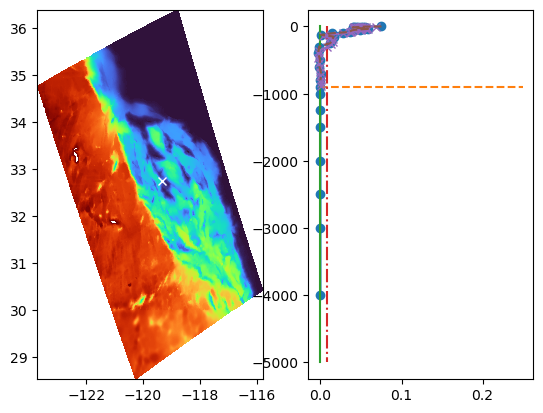

In [13]:

fig, ax = plt.subplots(nrows=1, ncols=2)
yy = OCN_R['depth'][:]
ilat = 200
ilon = 145

plevs=np.arange(0,4500,1)
cmap=plt.get_cmap('turbo')
plt.set_cmap(cmap)
cset1=ax[0].contourf(RMG['lon_rho'],RMG['lat_rho'],RMG['h'],plevs)
ax[0].plot(RMG['lon_rho'][ilat,ilon],RMG['lat_rho'][ilat,ilon],'wx')

xx = OCN_R['urm'][0,:,ilat,ilon]
ib = np.argwhere(np.isnan(xx))
ig = np.argwhere(np.isfinite(xx))
print(len(ib))
print(len(ig))

#Fz2 = RegularGridInterpolator(-yy,xx)

Fz = interp1d(-yy,xx,bounds_error=False,kind='linear',fill_value=(xx[0],xx[-1]))
znew = zr[:,ilat,ilon]
fnew = Fz(znew)
#fnew = np.interp(-yy,xx,znew)
#fnew2 = Fz2(znew)

#setattr(Fz,'values',OCN_R['vrm'][0,:,ilat,ilon])
#vnew = Fz(znew)


ax[1].plot(xx,-yy,'-o')
hrm = RMG['h'][ilat,ilon]
#hrm2 = np.max(xx)
#hrm1 = np.min(xx)
ax[1].plot([0,.25],[-hrm,-hrm],'--')
xx2 = OCN_R['ubar'][0,ilat,ilon]
ax[1].plot([0,0],[-yy[0],-yy[-1]])
ax[1].plot([xx2,xx2],[-yy[0],-yy[-1]],'-.')
ax[1].plot(OCN_IC['u'][0,:,ilat,ilon],znew,'-x')
#ax[1].plot(fnew2,znew,'-+')

hyz = OCN_R['depth']
igu = np.argwhere(hyz <= RMG['h'][ilat,ilon])
ax[1].plot(xx[igu],-yy[igu],'--')

dz = yy[1:]-yy[0:-1]
um = 0.5*( xx[1:] + xx[0:-1] )
ubar2 = np.sum(xx[igu]*dz[igu]) / yy[igu[-1]]
ubar3 = np.sum(xx[igu]*dz[igu]) / hrm
ubar4 = np.sum(um[igu]*dz[igu]) / hrm
print('the raw mean of the good vels is:')
print(np.mean(xx[igu]))
print('the depth average velocity calculated in ofun is:')
print(OCN_R['ubar'][0,ilat,ilon])
print('the depth average velocity in roms z from IC dict is:')
print(OCN_IC['ubar'][0,ilat,ilon])
print('simple depth average velocity is:')
print(ubar3)
print('midpoint formula depth avg vel is:')
print(ubar4)
print('looks like the ubar from ocnfun is good!!!')

#ib = np.argwhere(np.isnan(xx))
#ig = np.argwhere(np.isfinite(xx))

#print(np.shape(OCN_R['temp']))
#print(RMG['lat_rho'][ilat,ilon])
#print(RMG['lon_rho'][ilat,ilon])
#print(ib)
#print(yy[ib])
#print(RMG['h'][ilat,ilon])

#print(ig)


[-1.82688032e+03 -1.74536816e+03 -1.64162174e+03 -1.51955873e+03
 -1.38496667e+03 -1.24427280e+03 -1.10350649e+03 -9.67638180e+02
 -8.40299354e+02 -7.23791203e+02 -6.19265254e+02 -5.26976830e+02
 -4.46544002e+02 -3.77174935e+02 -3.17848758e+02 -2.67448829e+02
 -2.24854224e+02 -1.88997876e+02 -1.58899817e+02 -1.33682899e+02
 -1.12576823e+02 -9.49148594e+01 -8.01263705e+01 -6.77272594e+01
 -5.73097300e+01 -4.85322131e+01 -4.11099508e+01 -3.48064867e+01
 -2.94261554e+01 -2.48075692e+01 -2.08180461e+01 -1.73488944e+01
 -1.43114627e+01 -1.16338577e+01 -9.25824526e+00 -7.13865419e+00
 -5.23921428e+00 -3.53277241e+00 -1.99983908e+00 -6.27829399e-01]


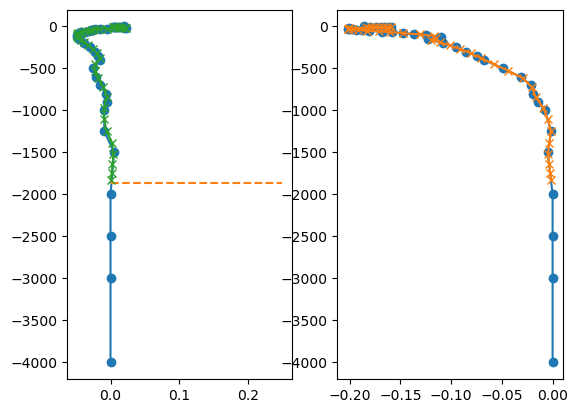

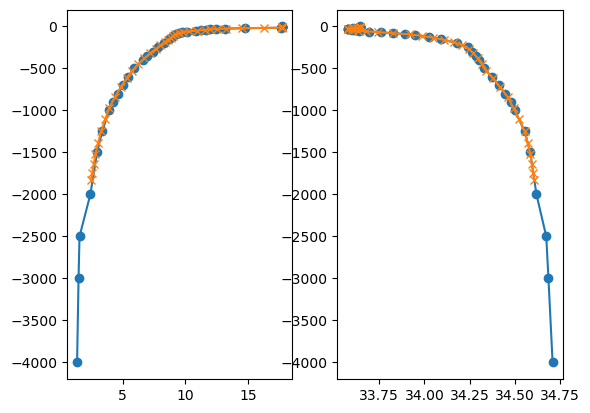

In [10]:
from scipy.interpolate import interp1d
import util_functions as utlfuns 
from util_functions import s_coordinate_4
from scipy.interpolate import RegularGridInterpolator

ilat = 130
ilon = 155
hrm = RMG['h'][ilat,ilon]

hraw = None
h = RMG['h']
eta = 0 * h
zrom = s_coordinate_4(h, 3.0 , 8.0 , 50.0 , 40, hraw=hraw, zeta=eta)
zr = np.squeeze(zrom.z_r[0,:,:,:])

fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].plot(OCN_R['urm'][0,:,ilat,ilon],-OCN_R['depth'][:],'-o')
ax[0].plot([0,.25],[-hrm,-hrm],'--')
ax[0].plot(OCN_IC['u'][0,:,ilat,ilon],zr[:,ilat,ilon],'-x')
ax[1].plot(OCN_R['vrm'][0,:,ilat,ilon],-OCN_R['depth'][:],'-o')
#ax[1].plot([0,.25],[-hrm,-hrm],'--')
ax[1].plot(OCN_IC['v'][0,:,ilat,ilon],zr[:,ilat,ilon],'-x')

fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].plot(OCN_R['temp'][0,:,ilat,ilon],-OCN_R['depth'][:],'-o')
#ax[2].plot([0,.25],[-hrm,-hrm],'--')
ax[0].plot(OCN_IC['temp'][0,:,ilat,ilon],zr[:,ilat,ilon],'-x')
ax[1].plot(OCN_R['salt'][0,:,ilat,ilon],-OCN_R['depth'][:],'-o')
#ax[3].plot([0,.25],[-hrm,-hrm],'--')
ax[1].plot(OCN_IC['salt'][0,:,ilat,ilon],zr[:,ilat,ilon],'-x')

print(zr[:,ilat,ilon])



Text(0.5, 1.0, '(pot temp - temp) [C]')

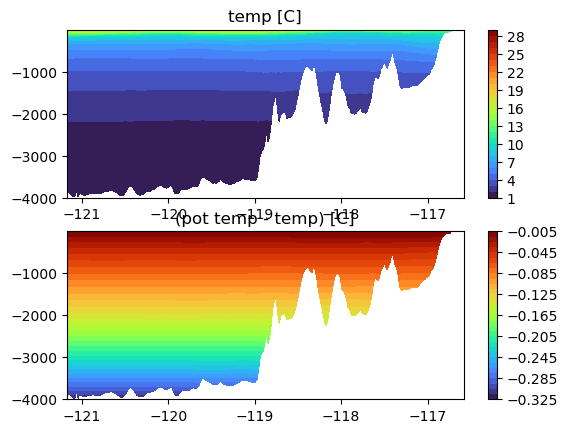

In [13]:
zz = np.squeeze(zr[:,ilat,:])
ln = np.squeeze(OCN_IC['lon_rho'][ilat,:])
ln2 = np.ones(np.shape(zz)) * ln[None,:]

fig, ax = plt.subplots(nrows=2, ncols=1)
plevs=np.arange(1,30,1)
cmap=plt.get_cmap('turbo')
plt.set_cmap(cmap)
cset1=ax[0].contourf(ln2,zz,OCN_IC['temp'][:,ilat,:],plevs)
cbar=fig.colorbar(cset1,ax=ax[0],orientation='vertical')
ax[0].set_title('temp [C]')

plevs=np.arange(-.325,0,.01)
cset1=ax[1].contourf(ln2,zz,OCN_IC['pottemp'][:,ilat,:]-OCN_IC['temp'][:,ilat,:],plevs)
cbar=fig.colorbar(cset1,ax=ax[1],orientation='vertical')
ax[1].set_title('(pot temp - temp) [C]')


(40, 390, 253)
(390, 253)


Text(0.5, 1.0, 'surface temp [C]')

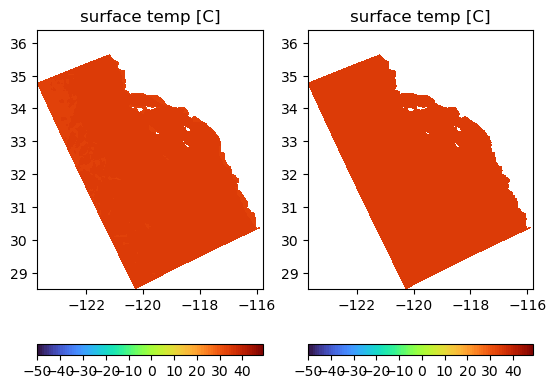

In [7]:
print(np.shape(OCN_IC['temp']))
print(np.shape(OCN_IC['lon_rho']))
#print(OCN_IC['lon_rho'])
#print(OCN_R['lon_rho'])
#print(RMG['lon_rho'])

fig, ax = plt.subplots(nrows=1, ncols=2)
plevs=np.arange(-50,50,1)
cmap=plt.get_cmap('turbo')
plt.set_cmap(cmap)
cset1=ax[0].contourf(OCN_IC['lon_rho'],OCN_IC['lat_rho'],OCN_IC['salt'][0,:,:],plevs)
cbar=fig.colorbar(cset1,ax=ax[0],orientation='horizontal')
ax[0].set_title('surface temp [C]')

cset1=ax[1].contourf(OCN_R['lon_rho'],OCN_R['lat_rho'],OCN_R['salt'][0,38,:,:],plevs)
cbar=fig.colorbar(cset1,ax=ax[1],orientation='horizontal')
ax[1].set_title('surface temp [C]')



In [9]:
aa=1
bb=1
zhy = OCN_R['depth'] # these are the hycom depths

fofz = np.squeeze(OCN_R['temp'][0,:,-1,-1])
ig = np.argwhere(np.isfinite(fofz))
print(len(ig))
fofz2 = fofz[ig]
Fz = interp1d(np.squeeze(-zhy[ig]),np.squeeze(fofz2),bounds_error=False,kind='linear',fill_value=(fofz2[0],fofz2[-1]))


print(np.shape(fofz2))
print(np.shape(zhy[ig]))



0


IndexError: index 0 is out of bounds for axis 0 with size 0

In [11]:
print(OCN['vinfo'])

dum=dict()
dum['vinfo']=OCN['vinfo']
dum['vinfo']['u']=dict()
dum['vinfo']['u']={'direction':'roms coordinates'}

print(dum['vinfo'])

{'lon': {'long_name': 'longitude', 'units': 'degrees_east'}, 'lat': {'long_name': 'latitude', 'units': 'degrees_north'}, 'ocean_time': {'long_name': 'OCN forcing time', 'units': 'days since tref'}, 'surf_el': {}, 'water_u': {}, 'water_v': {}, 'temp': {'long_name': 'ocean temperature', 'units': 'degrees C', 'coordinates': 'z,lat,lon', 'time': 'ocean_time'}, 'sal': {'long_name': 'ocean salinity', 'units': 'psu', 'coordinates': 'z,lat,lon', 'time': 'ocean_time'}, 'depth': {'long_name': 'ocean depth', 'units': 'm'}, 'u': {'long_name': 'ocean east west velocity', 'units': 'm/s', 'coordinates': 'z,lat,lon', 'time': 'ocean_time'}, 'v': {'long_name': 'ocean north south velocity', 'units': 'm/s', 'coordinates': 'z,lat,lon', 'time': 'ocean_time'}, 'eta': {'long_name': 'ocean sea surface height', 'units': 'm', 'coordinates': 'lat,lon', 'time': 'ocean_time'}}
{'lon': {'long_name': 'longitude', 'units': 'degrees_east'}, 'lat': {'long_name': 'latitude', 'units': 'degrees_north'}, 'ocean_time': {'lon

In [ ]:
make_roms_dotin
make_slurm_script
run_slurm_script


In [ ]:
import time
from datetime import datetime, timedelta
import subprocess


west =  -124.5 + 360
east = -115 + 360
south = 28
north = 37

yyyymmdd='20240716'
yyyy = yyyymmdd[0:4]
mm = yyyymmdd[4:6]
dd = yyyymmdd[6:8]

# time limits
dstr0 = yyyy + '-' + mm + '-' + dd + 'T12:00'
dstr1 = yyyy + '-' + mm + '-' + str( int(dd) + 3 ) + 'T00:00'
#dstr0 = dlist['dt0'].strftime('%Y-%m-%dT00:00') 
#dstr1 = dlist['dt1'].strftime('%Y-%m-%dT00:00')
# use subprocess.call() to execute the ncks command
vstr = 'surf_el,water_temp,salinity,water_u,water_v,depth'

full_fn_out='/Users/mspydell/research/FF2024/models/SDPM_mss/atm_stuff/ocn_hycom_tmp.nc'

# parker url: https://tds.hycom.org/thredds/dodsC/GLBy0.08/latest

url='https://tds.hycom.org/thredds/dodsC/GLBy0.08/expt_93.0/FMRC/runs/' 
url2 = 'GLBy0.08_930_FMRC_RUN_' + yyyy + '-' + mm + '-' + dd + 'T12:00:00Z' 
url3 = url + url2
cmd_list = ['ncks',
    '-d', 'time,'+dstr0+','+dstr1,
    '-d', 'lon,'+str(west)+','+str(east),
    '-d', 'lat,'+str(south)+','+str(north),
    '-v', vstr,
    url3 ,
    '-4', '-O', full_fn_out]
# old working command list
#cmd_list = ['ncks',
#    '-d', 'time,'+dstr0+','+dstr1,
#    '-d', 'lon,'+str(west)+','+str(east),
#    '-d', 'lat,'+str(south)+','+str(north),
#    '-v', vstr,
#    'https://tds.hycom.org/thredds/dodsC/GLBy0.08/expt_93.0',
#    '-4', '-O', full_fn_out]

print(cmd_list)

# run ncks
tt0 = time.time()
ret1 = subprocess.call(cmd_list)
#ret1 = 1
print('Time to get full file using ncks = %0.2f sec' % (time.time()-tt0))
print('Return code = ' + str(ret1) + ' (0=success, 1=skipped ncks)')


: 